<a href="https://colab.research.google.com/github/mn000000/Simulacion-2/blob/main/Acciones_Google_24_05_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


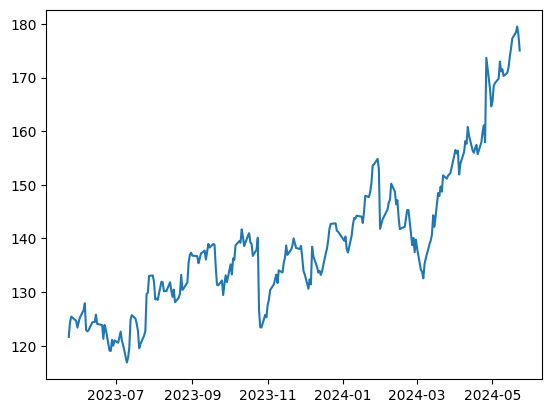

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime

ticker='GOOG'
start = datetime.datetime(2023,5,24)
end = datetime.datetime(2024,5,24)

try:
    data = yf.download(ticker, start=start, end=end)['Adj Close']
    GOOG = pd.DataFrame(data)
    #data.columns = [ticker]
    #print(data.head())
except Exception as e:
    print(f"Ocurrio un error al intentar descargar los datos:{e}")

GOOG.head()
GOOG.tail()
plt.plot(GOOG)

Date
2023-05-24         NaN
2023-05-25    0.022034
2023-05-26    0.008648
2023-05-30   -0.006318
2023-05-31   -0.010242
                ...   
2024-05-17    0.010547
2024-05-20    0.006578
2024-05-21    0.006033
2024-05-22   -0.008614
2024-05-23   -0.016655
Name: simple_return, Length: 252, dtype: float64
36.260999999999996%


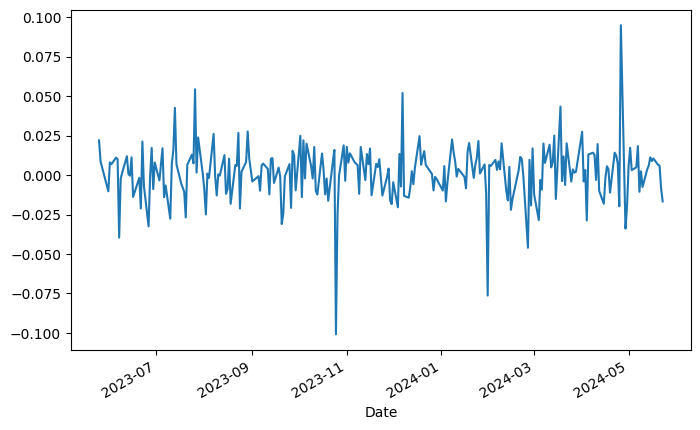

In [3]:
GOOG['simple_return'] = np.log(GOOG['Adj Close'] / GOOG['Adj Close'].shift(1))
print(GOOG['simple_return'])
GOOG['simple_return'].plot(figsize=(8,5))
avg_returns_d = GOOG['simple_return'].mean()
avg_returns_d

# Este es el retorno diario
# El retorno anual, se calcula no multiplicando por 365, pues no hay actividad diaria realmente.
# Por quitar días sabado, domingo y feriados.
# Lo correcto es 250, a veces 251 o 252
# Así, el retorno anual es
avg_returns_a = GOOG['simple_return'].mean() * 250
avg_returns_a
print(str(round(avg_returns_a, 5) * 100) + '%')